In [2]:
%pip install statsmodels
%pip install pip --upgrade pip
%pip install numpy
%pip install pandas
%pip install scipy==1.15.3
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [44]:
df = pd.read_csv('Company_data.csv', header = 0)
print(df.info())

print(df.head())

print(df.describe())

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

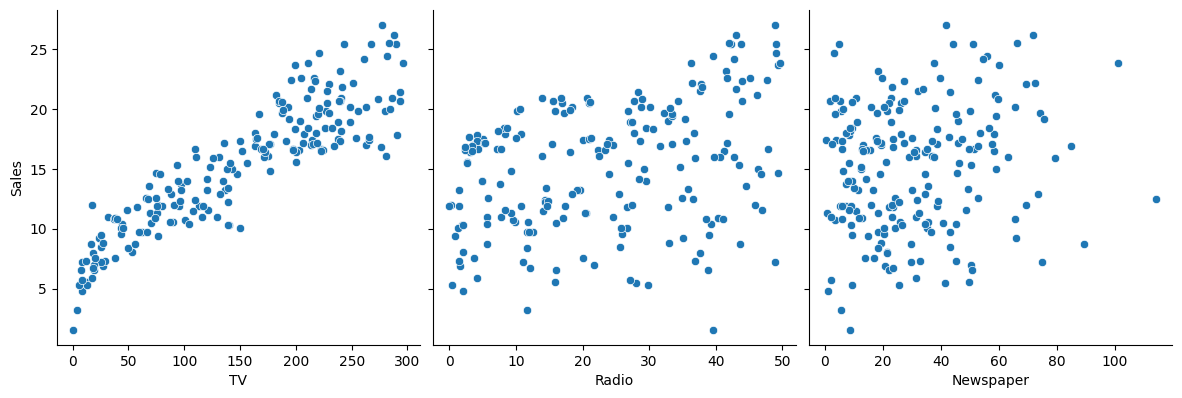

In [6]:
sb.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height = 4, kind='scatter')
plt.show()

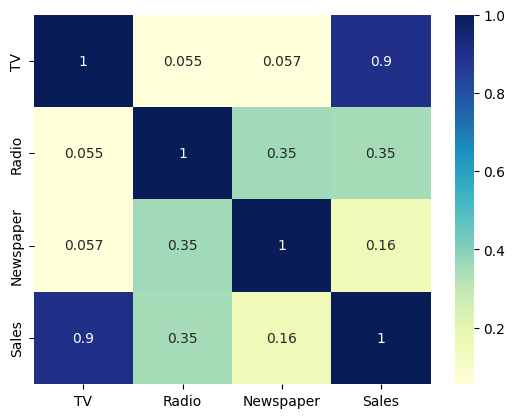

In [7]:
sb.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [8]:
# This is where we start some linear regression
#Create X which is our feature:
X = df['TV']

#Create our y which is our label
y = df['Sales']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
X_train_sm = sm.add_constant(X_train)


In [33]:
lr=sm.OLS(y_train, X_train_sm).fit()

lr.params

const    6.948683
TV       0.054546
dtype: float64

In [34]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           1.52e-52
Time:                        21:49:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 1 The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
We have to make sure that the p-value should always be less for the coefficient to be significant
- 2 R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.
- 3 Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

------
If our line equation is y=mx+c  then from the summary:
- y ('Sales) = 
- mX which is: coefficient * TV, in our case: 0.054 * 'TV'
- +C which is the const, in our case 6.9487 

the r2 value is 0.816 - we can compare this against the test value:

In [35]:
r_squared_train = lr.rsquared
r_squared_train

np.float64(0.8157933136480389)

<function matplotlib.pyplot.show(close=None, block=None)>

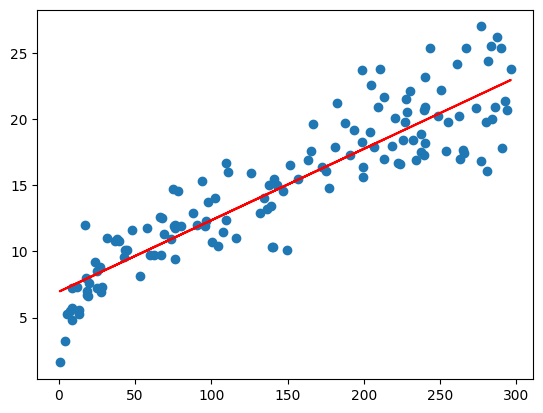

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 +0.054*X_train, 'r')
plt.show

This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.
Residual Analysis

One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

Now from the dataset, We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [37]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

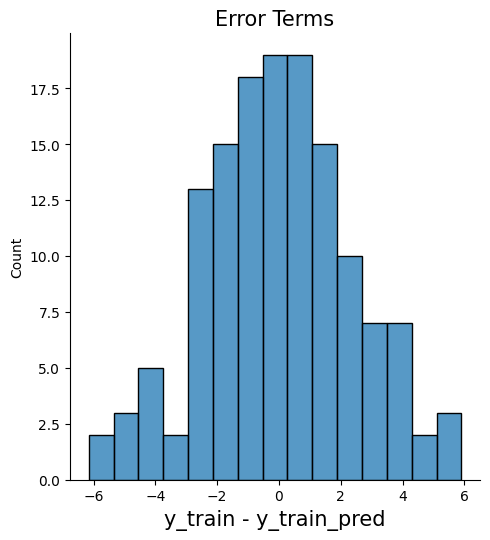

In [38]:
fig = plt.figure()
sb.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

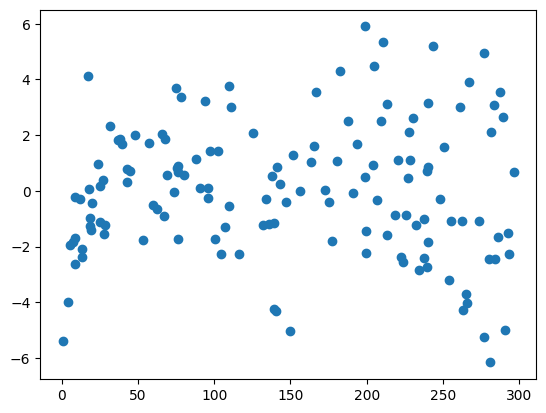

In [39]:
plt.scatter(X_train, res)
plt.show

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data.

Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [40]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [45]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
print ("r squared value of test:")
print(r_squared)

percentage_diff = (r_squared_train - r_squared)/(r_squared_train + r_squared)*100
print ("% difference between training and test:")
print(percentage_diff)

r squared value of test:
0.7921031601245663
% difference between training and test:
1.4733631119849662


Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

<function matplotlib.pyplot.show(close=None, block=None)>

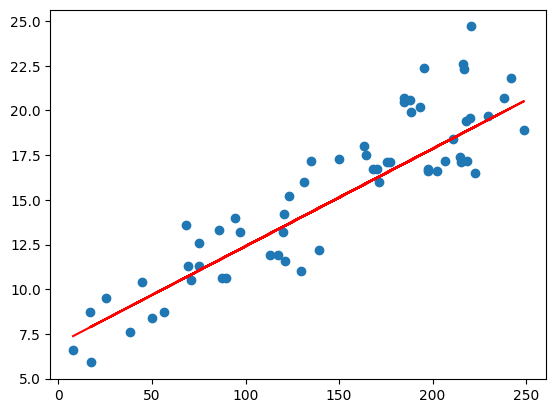

In [46]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show

# We can try again with the SKLEARN model;

In [50]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print("Current shape:")
print(X_train_lm.shape)

# Add an additional column
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1, 1)

print("Shape now:")
print(X_train_lm.shape)
print(X_test_lm.shape)


Current shape:
(140,)
Shape now:
(140, 1)
(60, 1)


In [51]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
#intercept value (C in y = mx+c)

print("Intercept:", lm.intercept_)

# slope

print("slope", lm.coef_)

Intercept: 6.948683200001357
slope [0.05454575]


Note these are the same values we got from the statsmodel

In [56]:
# predictions

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the R squared values

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))


0.8157933136480389
0.7921031601245662


<function matplotlib.pyplot.show(close=None, block=None)>

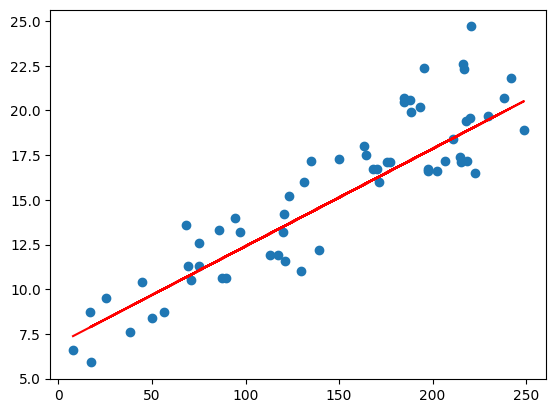

In [57]:
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test, y_test_pred, 'r')
plt.show